In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Unit Conversion
lbs2kg = 0.453592 # lbs to kg (Weight)
slugft2kgm = 1.35581795 # slug ft^2 to kg m^2 (Intertia)
mi2km = 1.60934 # Mi to Km (Distance)
deg2Rad = 57.2958 # deg to rad

In [10]:
# Camera Data Dictionary
optics = {'MAVIC2': {'f': 28, 'h': 25.4, 'x': 12.8, 'y': 10},#9.6},
          'GoProHero7': {'f': 24, 'h': 6.17, 'x': 6.17, 'y': 4.55},
          'NightEagle': {'f': 24, 'h': 25.4, 'x': 7.18, 'y': 5.32},
          'Hybrid': {'f': 24, 'h': 12, 'x': 12.8, 'y': 9.6}}

In [11]:
# Optical Camera Analysis
# Aircraft Speed Constrained by Optic

def optic_sensor(optics, model):
    return optics[model]

def optic_analysis(sensor_model, param):
    f = sensor_model['f']
    h = sensor_model['h']
    P = param[0]
    frame_rate = param[1]
    H = param[2]
    
    AFOV = 2*np.arctan(h/(2*f))
    print(AFOV)
    S = 2*H*np.tan(AFOV/2) # Diameter of an intersection of the cone at surface
    VT = frame_rate*S*(1 - P) # m/s
    t_exp = 1/frame_rate # Flight Time (sec)
    Dist_travel = VT*t_exp
    A = S*Dist_travel # m^2
    
    return [VT, S, A]

In [13]:
model = ['MAVIC2', 'GoProHero7', 'NightEagle', 'Hybrid']

# Input Parameter: [P, frame rate, H]
param = [0.5, 30, 50]

VT = []
S = []
A = []

for i in range(len(model)):
    model_name = model[i]
    sensor_model = optic_sensor(optics, model_name)
    VT_i, S_i, A_i = optic_analysis(sensor_model, param)
    VT.append(VT_i)
    S.append(S_i)
    A.append(A_i)
    print('Model Name: ', model_name)
    print('VT: ', VT_i, 'm/s')
    print('S: ', S_i, 'm')
    print('A: ', A_i, 'm^2')
    print('')

0.8516399125805978
Model Name:  MAVIC2
VT:  680.3571428571428 m/s
S:  45.357142857142854 m
A:  1028.6352040816325 m^2

0.2556812810540472
Model Name:  GoProHero7
VT:  192.8125 m/s
S:  12.854166666666666 m
A:  82.61480034722221 m^2

0.9734155419347031
Model Name:  NightEagle
VT:  793.75 m/s
S:  52.916666666666664 m
A:  1400.0868055555554 m^2

0.4899573262537283
Model Name:  Hybrid
VT:  375.0 m/s
S:  25.0 m
A:  312.5 m^2



In [18]:
def optic_analysis_sensor(param):
    P = param[0] # % Overlap
    frame_rate = param[1] # fps
    H = param[2] # Altitude (m)
    x = param[3]*1e-3 # sensor size in x (m)
    y = param[4]*1e-3 # sensor size in y (m)
    f = param[5]*1e-3 # focal length (m)
    
    ax = (H / f) * x
    ay = (H / f) * y
    
    dist_travel = ay*(1-P)
    
    VT = frame_rate * dist_travel
    
    A = ay * ax # m^2/s
    
    return [VT, A]

In [19]:
def sensor_spec(optics, model_name):
    model = optics[model_name]
    x = model['x']
    y = model['y']
    f = model['f']
    return [x, y, f]

In [20]:
def constraint_Calculation(model, overlap, framerate, altitude):
    Velocity = []
    Area = []
    
    data = sensor_spec(optics, model)

    # Input Parameter: [P, frame rate, H, x, y, f]
    p = overlap
    fr = framerate
    H = altitude
    x = data[0]
    y = data[1]
    f = data[2]

    param = [p, fr, H, x, y, f]
    VT, A = optic_analysis_sensor(param)
    Velocity.append(VT)
    Area.append(A)
    #print('Model: ', model)
    #print('VT = ', VT, 'm/s, A = ', A, 'm^2/s\n')        
    return(Velocity, Area)

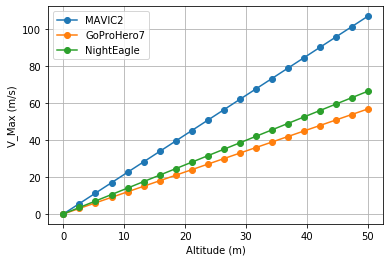

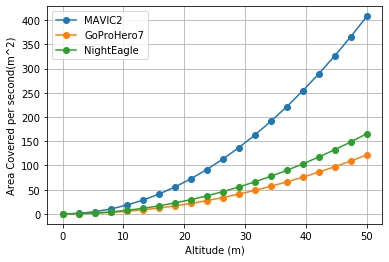

In [28]:
overlap = 0.9 # 90% overlap
framerate = 60 # frame rate photo/sec
length = 20
alt = np.linspace(0, 50, num=length) # Altitude

model = ['MAVIC2', 'GoProHero7', 'NightEagle']

V1, A1 = constraint_Calculation(model[0], overlap, framerate, alt)
V2, A2 = constraint_Calculation(model[1], overlap, framerate, alt)
V3, A3 = constraint_Calculation(model[2], overlap, framerate, alt)

Vel = [[V1], [V2], [V3]]
Area = [[A1], [A2], [A3]]

plt.figure()
plt.plot(alt, Vel[0][0][0], 'o-', label='MAVIC2')
plt.plot(alt, Vel[1][0][0], 'o-', label='GoProHero7')
plt.plot(alt, Vel[2][0][0], 'o-', label='NightEagle')
plt.xlabel('Altitude (m)')
plt.ylabel('V_Max (m/s)')
plt.legend(loc='upper left')
plt.grid()

plt.figure()
plt.plot(alt, Area[0][0][0], 'o-', label='MAVIC2')
plt.plot(alt, Area[1][0][0], 'o-', label='GoProHero7')
plt.plot(alt, Area[2][0][0], 'o-', label='NightEagle')
plt.xlabel('Altitude (m)')
plt.ylabel('Area Covered per second(m^2)')
plt.legend(loc='upper left')
plt.grid()

plt.show()